<a href="https://colab.research.google.com/github/hkumarks/Deep_Learning/blob/main/Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import glob
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
url='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

zip_file=tf.keras.utils.get_file(origin=url,
                                 fname='flower_photos.tgz',
                                 extract=True)

base_dir=os.path.join(os.path.dirname(zip_file),'flower_photos')

228818944/228813984 [==============================] - 3s 0us/step


In [4]:
classes=['roses','daisy','dandelion','sunflowers','tulips']

In [6]:
for c in classes:
  path=os.path.join(base_dir,c)
  images=glob.glob(path+'/*.jpg')
  print(f'{c}: {len(images)} Images')
  train,val=images[:round(len(images)*0.8)],images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir,'train',c)):
      os.makedirs(os.path.join(base_dir,'train',c))
    shutil.move(t,os.path.join(base_dir,'train',c))

  for v in val:
    if not os.path.exists(os.path.join(base_dir,'val',c)):
      os.makedirs(os.path.join(base_dir,'val',c))
    shutil.move(v,os.path.join(base_dir,'val',c))    

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [7]:
train_dir=os.path.join(base_dir,'train')
val_dir=os.path.join(base_dir,'val')

In [10]:
image_gen=ImageDataGenerator(rescale=1./255,
                             horizontal_flip=True)

train_data_gen=image_gen.flow_from_directory(directory=train_dir,
                                             target_size=(150,150),
                                             batch_size=100,
                                             shuffle=True)

Found 2935 images belonging to 5 classes.


In [14]:
def plotImages(imageArr):
  fig,axes=plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(imageArr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()  

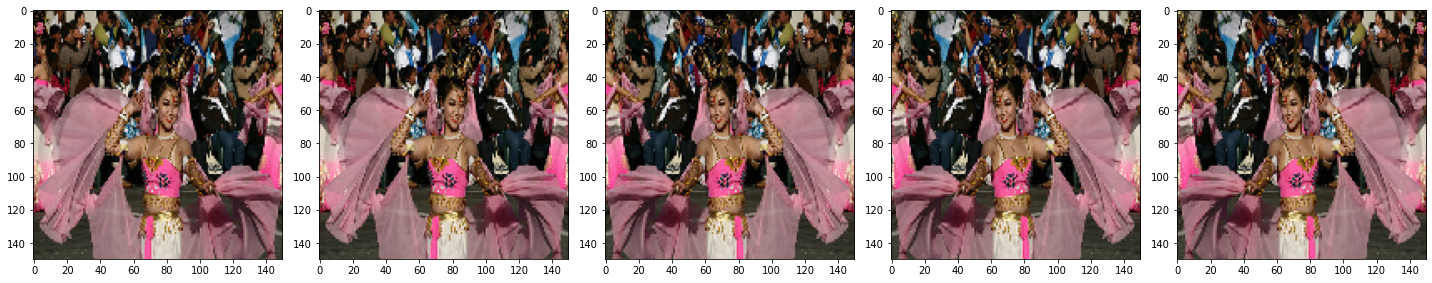

In [15]:
augmentedImages=[train_data_gen[0][0][0] for i in range(5)]
plotImages(augmentedImages)

Found 2935 images belonging to 5 classes.


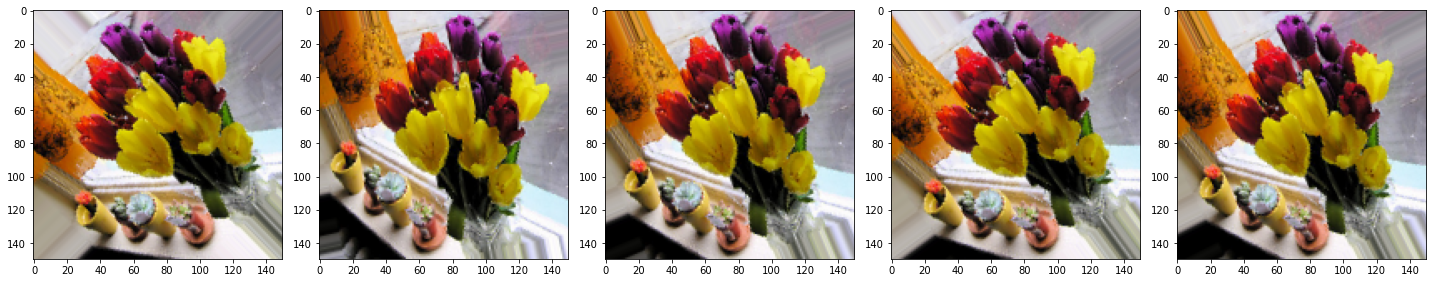

In [16]:
image_gen=ImageDataGenerator(rescale=1./255,
                             rotation_range=45)

train_data_gen=image_gen.flow_from_directory(directory=train_dir,
                                             target_size=(150,150),
                                             batch_size=100,
                                             shuffle=True)

augmentedImages=[train_data_gen[0][0][0] for i in range(5)]
plotImages(augmentedImages)

Found 2935 images belonging to 5 classes.


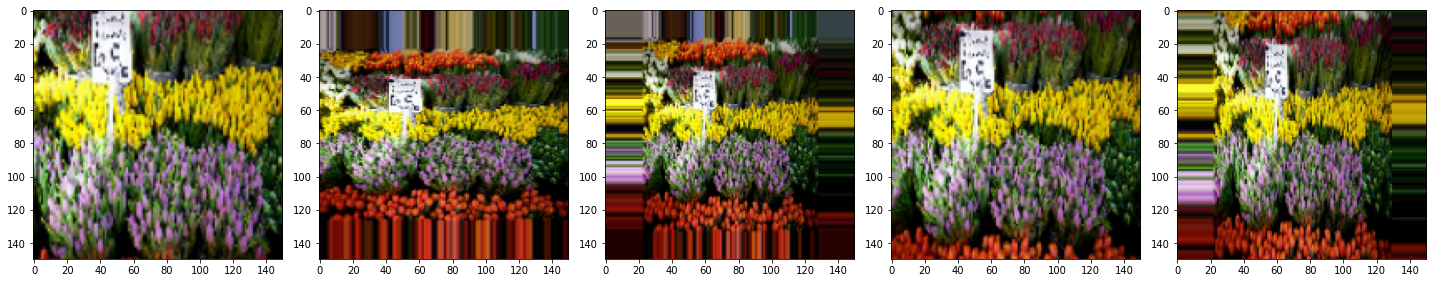

In [17]:
image_gen=ImageDataGenerator(rescale=1./255,
                             zoom_range=0.5)

train_data_gen=image_gen.flow_from_directory(directory=train_dir,
                                             target_size=(150,150),
                                             batch_size=100,
                                             shuffle=True)

augmentedImages=[train_data_gen[0][0][0] for i in range(5)]
plotImages(augmentedImages)

Found 2935 images belonging to 5 classes.


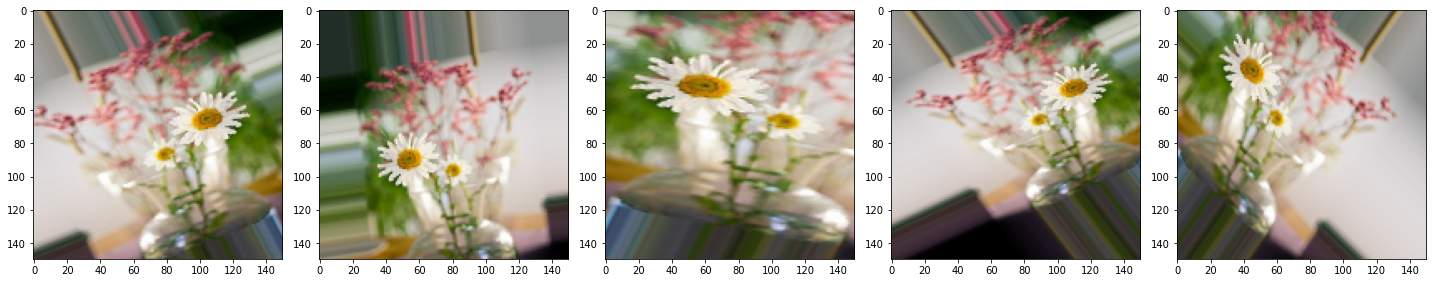

In [20]:
image_gen=ImageDataGenerator(rescale=1./255,
                             rotation_range=45,
                             zoom_range=0.5,
                             horizontal_flip=True,
                             width_shift_range=0.15,
                             height_shift_range=0.15)

train_data_gen=image_gen.flow_from_directory(directory=train_dir,
                                             target_size=(150,150),
                                             batch_size=100,
                                             shuffle=True,
                                             class_mode='sparse')

augmentedImages=[train_data_gen[0][0][0] for i in range(5)]
plotImages(augmentedImages)

In [21]:
image_gen_val=ImageDataGenerator(rescale=1./255)
val_data_gen=image_gen_val.flow_from_directory(directory=val_dir,
                                               class_mode='sparse',
                                               batch_size=100,
                                               target_size=(150,150))

Found 735 images belonging to 5 classes.


In [23]:
model=tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='softmax'),
    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5)                               
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
history=model.fit_generator(
    generator=train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n/float(100))),
    epochs=80,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n/float(100))),
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/80
30/30 [==============================] - 21s 703ms/step - loss: 1.5965 - accuracy: 0.2521 - val_loss: 1.5780 - val_accuracy: 0.3333
Epoch 2/80
30/30 [==============================] - 21s 715ms/step - loss: 1.5724 - accuracy: 0.3182 - val_loss: 1.5518 - val_accuracy: 0.3660
Epoch 3/80
30/30 [==============================] - 21s 711ms/step - loss: 1.5441 - accuracy: 0.3486 - val_loss: 1.5454 - val_accuracy: 0.3660
Epoch 4/80
30/30 [==============================] - 21s 711ms/step - loss: 1.5193 - accuracy: 0.3755 - val_loss: 1.4952 - val_accuracy: 0.4735
Epoch 5/80
30/30 [==============================] - 21s 714ms/step - loss: 1.4961 - accuracy: 0.4133 - val_loss: 1.4704 - val_accuracy: 0.5020
Epoch 6/80
30/30 [==============================] - 21s 710ms/step - loss: 1.4696 - accuracy: 0.4293 - val_loss: 1.4604 - val_accuracy: 0.4667
Epoch 7/80
30/30 [==============================] - 21s 708ms/step

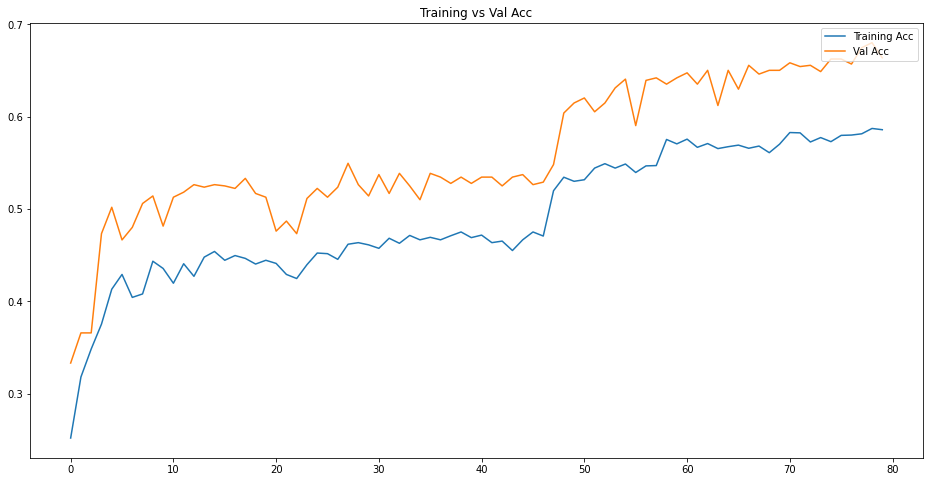

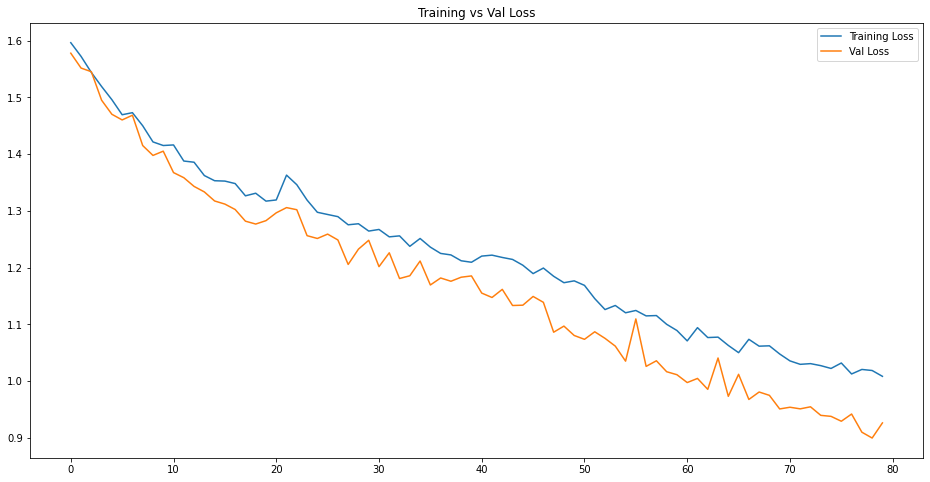

In [31]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epoch_range=range(80)

plt.figure(figsize=(16,8))
plt.plot(epoch_range,acc,label='Training Acc')
plt.plot(epoch_range,val_acc,label='Val Acc')
plt.title('Training vs Val Acc')
plt.legend(loc='upper right')

plt.figure(figsize=(16,8))
plt.plot(epoch_range,loss,label='Training Loss')
plt.plot(epoch_range,val_loss,label='Val Loss')
plt.title('Training vs Val Loss')
plt.legend(loc='upper right')
plt.show()